# **Comparing Classification Algorithms**  
This project compares different classification algorithms (Logistic Regression, SVM, KNN, Decision Tree) on a very popular diabetes dataset.  

### **Imported Libraries:**
* `numpy`, `pandas` - Data handling and numerical operations  
* `matplotlib.pyplot`, `seaborn` - Data visualization  
* `kagglehub`, `os` - Dataset management  
* `train_test_split` - Splitting data into training and test sets  
* `StandardScaler` - Normalizing features  
* `LogisticRegression`, `SVC`, `KNeighborsClassifier`, `DecisionTreeClassifier` - Classification models  
* `accuracy_score`, `classification_report`, `confusion_matrix`, `log_loss` - Model evaluation metrics  


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, recall_score, precision_score

### **Exploring the dataset**

**Pregnancies**: Number of pregnancies

**Glucose**: Glucose level in blood

**BloodPressure**: Blood Pressure measurement

**SkinThickness**: Thickness of the skin

**Insulin**: Insulin level in blood

**BMI**: Body Mass Index

**DiabetesPedigreeFunction**: Estimates the likelihood of developing diabetes based on a person's age and family history

**Age**: Age

**Outcome**: 1 - Diabetes, 0 - No diabetes

In [49]:
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")
data = pd.read_csv(os.path.join(path, "diabetes.csv"))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Feature distributions**

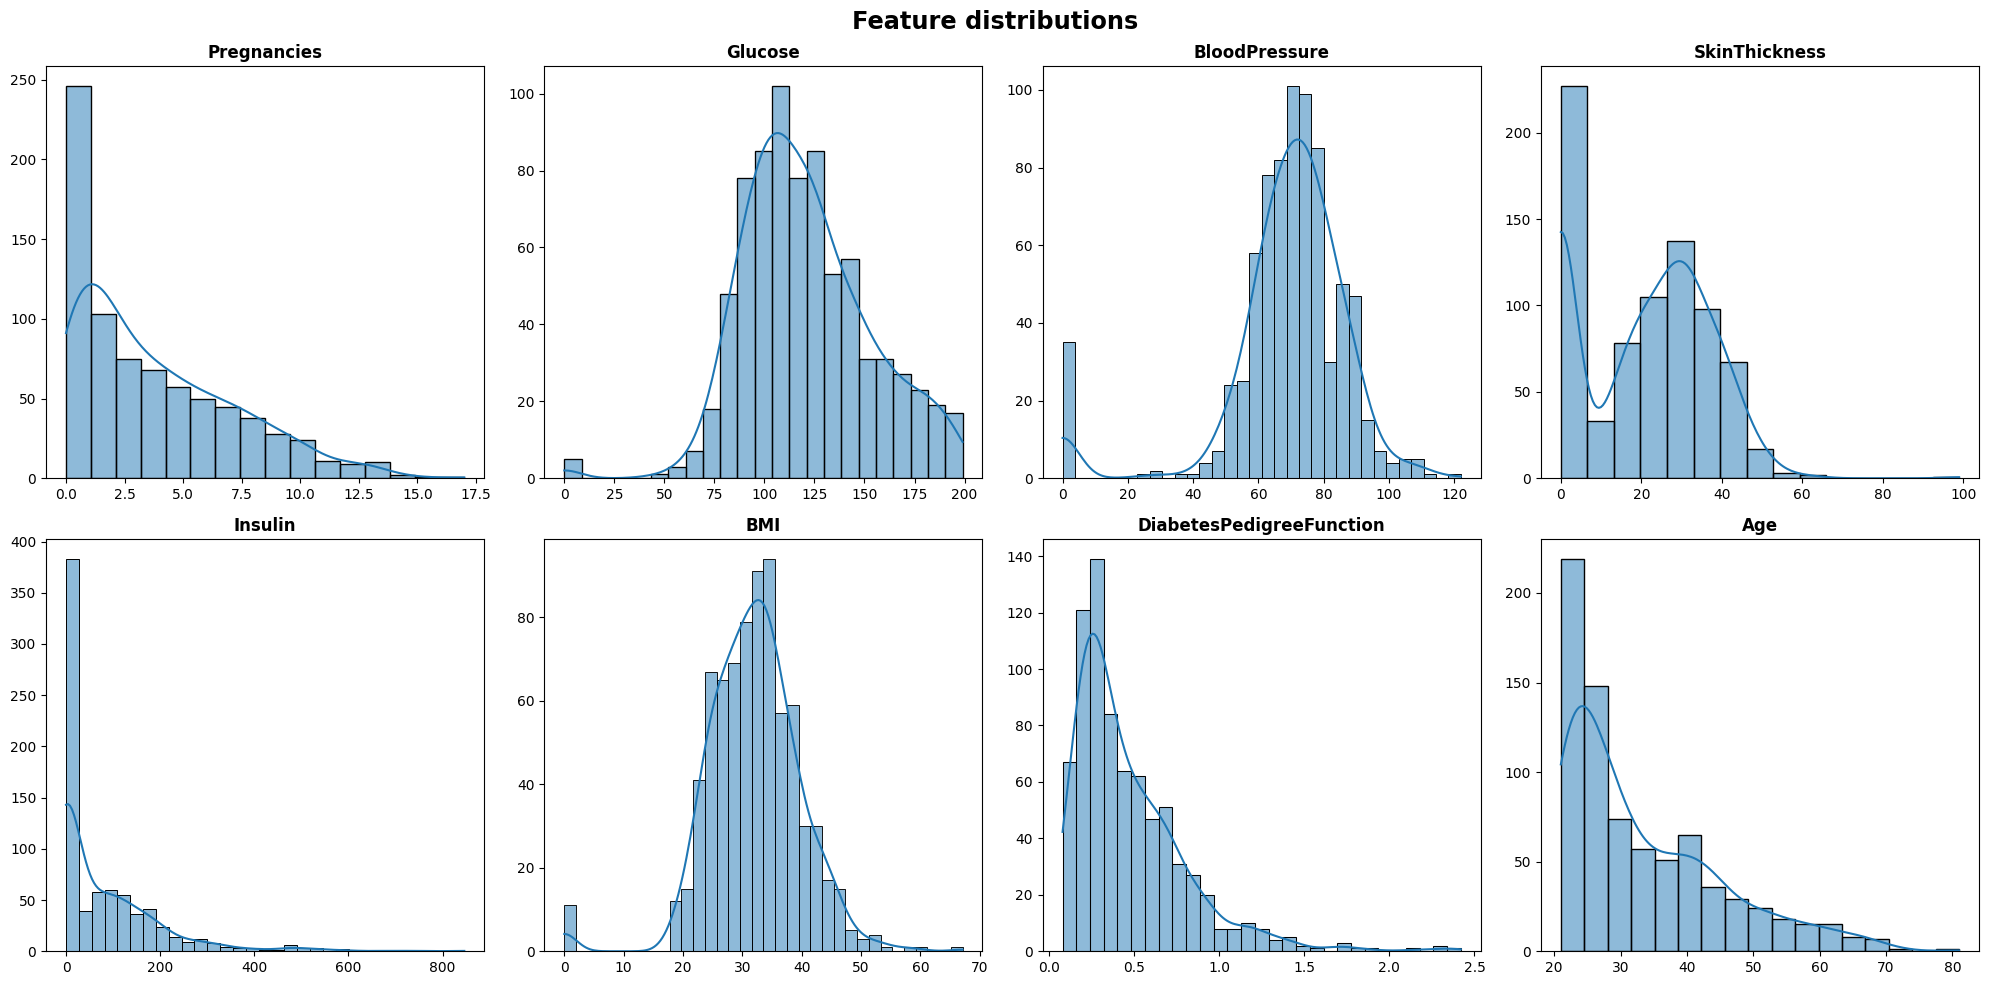

In [20]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax = ax.flatten()
for i, col in enumerate(data.columns[:-1]):
    sns.histplot(data=data, x=col, ax=ax[i], kde=True)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(col, fontweight='bold')
plt.suptitle('Feature distributions', fontsize='xx-large', fontweight='bold')
plt.tight_layout()
plt.show()

### **Features correlation**

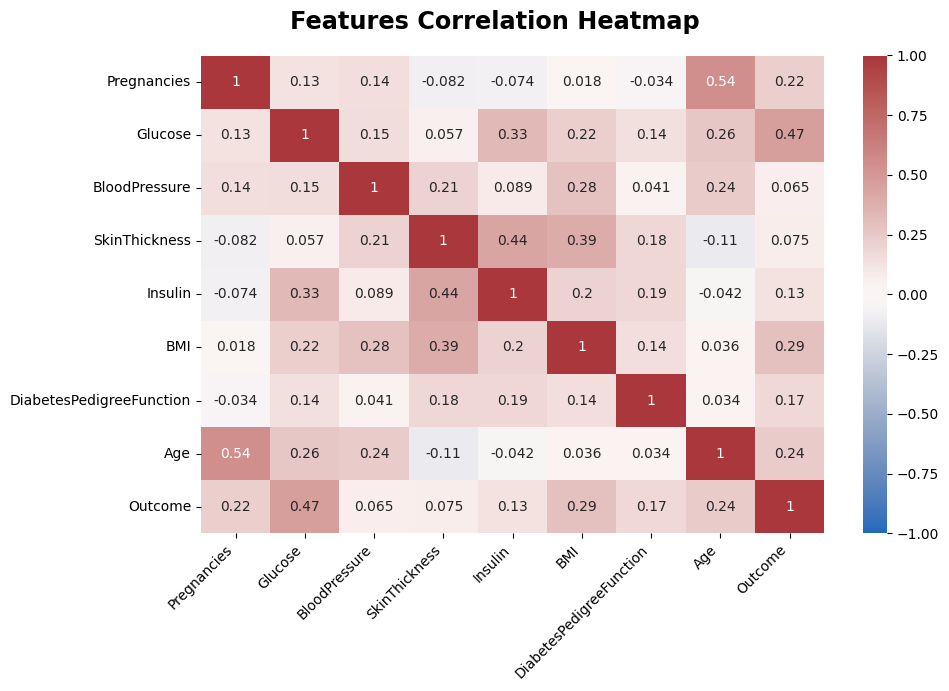

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="vlag", ax=ax, vmin=-1, vmax=1)
label = ax.get_xticklabels()
plt.setp(label, rotation=45, horizontalalignment='right')
fig.suptitle('Features Correlation Heatmap', fontsize='xx-large', fontweight='bold')
plt.tight_layout()
plt.show()


# **Classification**

### **Splitting the data**
First, splitting the data into a feature matrix X and a target vector y, then into a training set and a test set.

In [58]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### **Data scaling**

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Fitting the Models and evaluating their performances**
Training the models on dedicated training set and testing them on unseen data.
### Classification Metrics Formulas

- **Accuracy** – how many predictions were correct overall:

  $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


- **Recall** – how many actual positive cases were correctly predicted:

  $Recall = \frac{TP}{TP + FN}$


- **Precision** – how many predicted positive cases were actually correct:

  $Precision = \frac{TP}{TP + FP}$

Where:  
- `TP` = True Positives  
- `TN` = True Negatives  
- `FP` = False Positives  
- `FN` = False Negatives


### **Hyperparameter Grid Configuration**

This dictionary defines the models and their hyperparameter grids used for **GridSearchCV** to optimize performance.

Each key is the name of a classification model, and its value is a dictionary containing:

- **`model`** – the sklearn (or xgboost) model object to be optimized,
- **`params`** – a dictionary of hyperparameters and the list of values to try.

#### **Models and Parameters:**
- **Logistic Regression**:
  - `C`: Regularization strength (smaller means stronger regularization).
  - `solver`: Algorithm to use in the optimization problem.

- **SVC (Support Vector Classifier)**:
  - `C`: Regularization parameter.
  - `kernel`: Specifies the kernel type to be used in the algorithm (`linear` or `rbf`).

- **KNN (K-Nearest Neighbors)**:
  - `n_neighbors`: Number of neighbors to use.
  - `weights`: Weight function used in prediction.

- **Random Forest**:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of each tree.

- **XGBoost**:
  - `n_estimators`: Number of gradient boosted trees.
  - `learning_rate`: Step size shrinkage used in updates.
  - `max_depth`: Maximum depth of a tree.

This structure allows easy iteration through multiple models and hyperparameter sets using Grid Search.

In [61]:
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}

In [62]:
results = {}

for name, cfg in param_grids.items():
    grid = GridSearchCV(cfg['model'], cfg['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'y_pred': y_pred
    }

    print(f'{name} (best params: {grid.best_params_}):')
    print(f'Accuracy: {accuracy:.2f},\tRecall: {recall:.2f},\tPrecision: {precision:.2f}\n')

Logistic Regression (best params: {'C': 1, 'solver': 'liblinear'}):
Accuracy: 0.81,	Recall: 0.62,	Precision: 0.81

SVC (best params: {'C': 10, 'kernel': 'linear'}):
Accuracy: 0.81,	Recall: 0.64,	Precision: 0.80

KNN (best params: {'n_neighbors': 5, 'weights': 'uniform'}):
Accuracy: 0.75,	Recall: 0.64,	Precision: 0.66

Random Forest (best params: {'max_depth': 10, 'n_estimators': 100}):
Accuracy: 0.79,	Recall: 0.62,	Precision: 0.74

XGBoost (best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}):
Accuracy: 0.74,	Recall: 0.45,	Precision: 0.71



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### **Results Visualization**
Confusion matrices show the full performance of the models by displaying the number of true positives, true negatives, false positives, and false negatives. They help evaluate how well the model distinguishes between classes and identify specific types of errors.

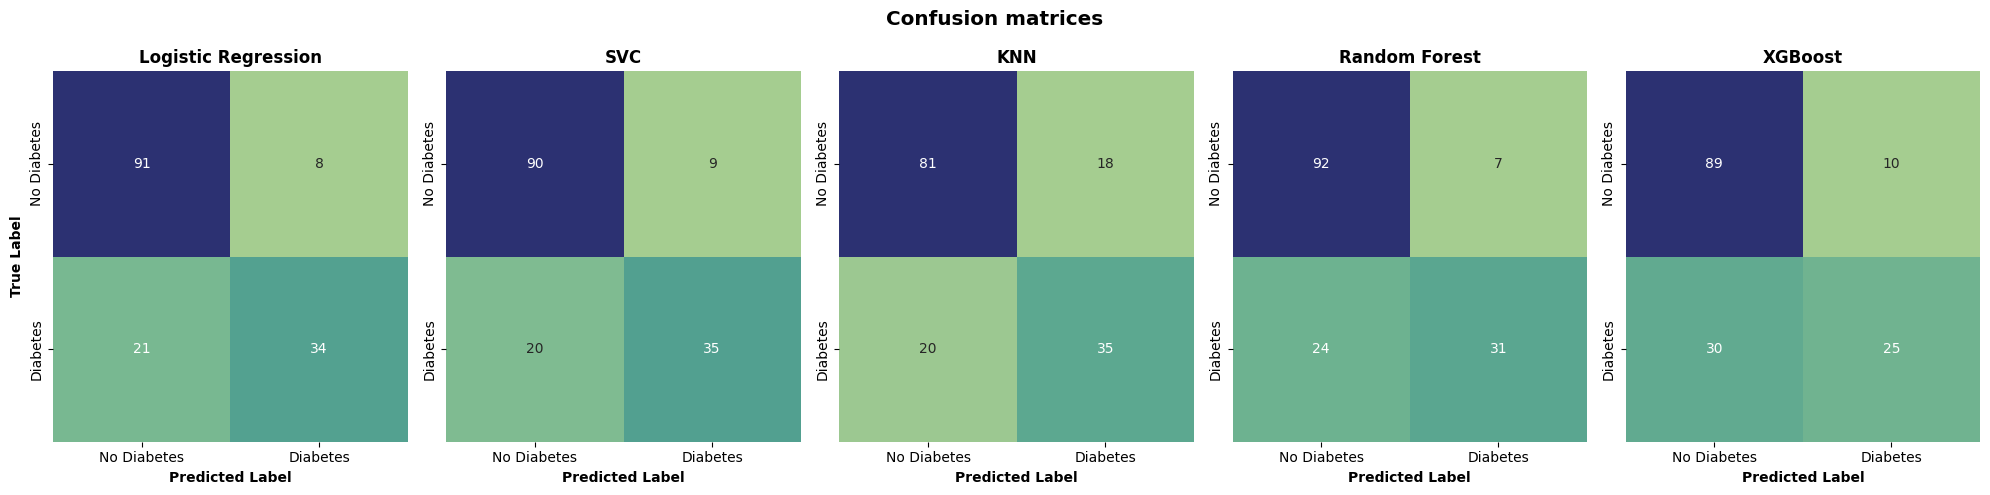

In [47]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
ax = ax.flatten()

for i, (name, data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, data['y_pred'])

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap="crest",
        cbar=False,
        xticklabels=["No Diabetes", "Diabetes"],
        yticklabels=["No Diabetes", "Diabetes"],
        ax=ax[i]
    )
    ax[i].set_title(f'{name}', fontweight='bold')
    ax[i].set_xlabel("Predicted Label", fontweight='bold')
    if i == 0:
        ax[i].set_ylabel("True Label", fontweight='bold')
    else:
        ax[i].set_ylabel('')
    plt.suptitle('Confusion matrices', fontweight='bold', fontsize='x-large')
plt.tight_layout()
plt.show()

### **Summary**

The classification models show varying levels of performance across different metrics:

- **Logistic Regression** and **SVC** achieved the highest accuracy (**0.81**), with SVC slightly outperforming in recall (**0.64** vs **0.62**).
- **KNN** reached a lower accuracy (**0.75**), but matched SVC in recall, making it better at detecting positive cases despite lower precision.
- **Random Forest** delivered a balanced result with good accuracy (**0.79**) and decent precision (**0.74**).
- **XGBoost**, while powerful in many tasks, performed the weakest in this case with the lowest recall (**0.45**) despite reasonable precision (**0.71**).

Overall, **Logistic Regression** and **SVC** appear to be the most reliable models for this specific classification task.
